# Milestone 4
-----------------------------------------

In [3]:
from code_snippets.AirlineDataQuerier import AirlineDataQuerier

querier = AirlineDataQuerier(appname='milestone4', master='spark://192.168.88.235:7777')

21/12/03 00:54:15 WARN UDTRegistration: Cannot register UDT for org.locationtech.jts.geom.Geometry, which is already registered.
21/12/03 00:54:15 WARN UDTRegistration: Cannot register UDT for org.locationtech.jts.index.SpatialIndex, which is already registered.
21/12/03 00:54:15 WARN SimpleFunctionRegistry: The function st_pointfromtext replaced a previously registered function.
21/12/03 00:54:15 WARN SimpleFunctionRegistry: The function st_polygonfromtext replaced a previously registered function.
21/12/03 00:54:15 WARN SimpleFunctionRegistry: The function st_linestringfromtext replaced a previously registered function.
21/12/03 00:54:15 WARN SimpleFunctionRegistry: The function st_geomfromtext replaced a previously registered function.
21/12/03 00:54:15 WARN SimpleFunctionRegistry: The function st_geomfromwkt replaced a previously registered function.
21/12/03 00:54:15 WARN SimpleFunctionRegistry: The function st_geomfromwkb replaced a previously registered function.
21/12/03 00:54:

In [4]:
# getting the k to cities with most incoming airlines
res = querier.get_top_k_cities_with_most_incoming_airlines(k=5)

# Bar plot of k cities with most incoming airlines

In [5]:
import seaborn as sns

In [6]:
def plot_k_cities_with_the_most_incoming_airlines(k=10):
    global querier
    # get data
    cities_with_airline_count = querier.get_top_k_cities_with_most_incoming_airlines(k=k).toPandas()
    
    # plot
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x='number', y='city', data=cities_with_airline_count)
    ax.set_xlabel("Number of Incoming Airlines")
    ax.set_ylabel("City")
    ax.set_title(f"{k} Cities with the Most Incoming Airlines")

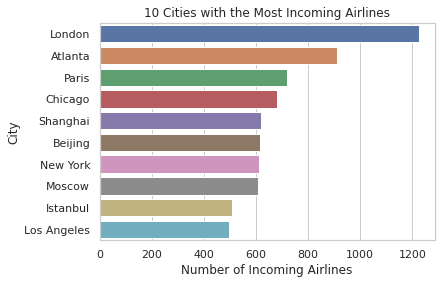

In [33]:
plot_k_cities_with_the_most_incoming_airlines(k=10);

# Map of k closest airports to a city

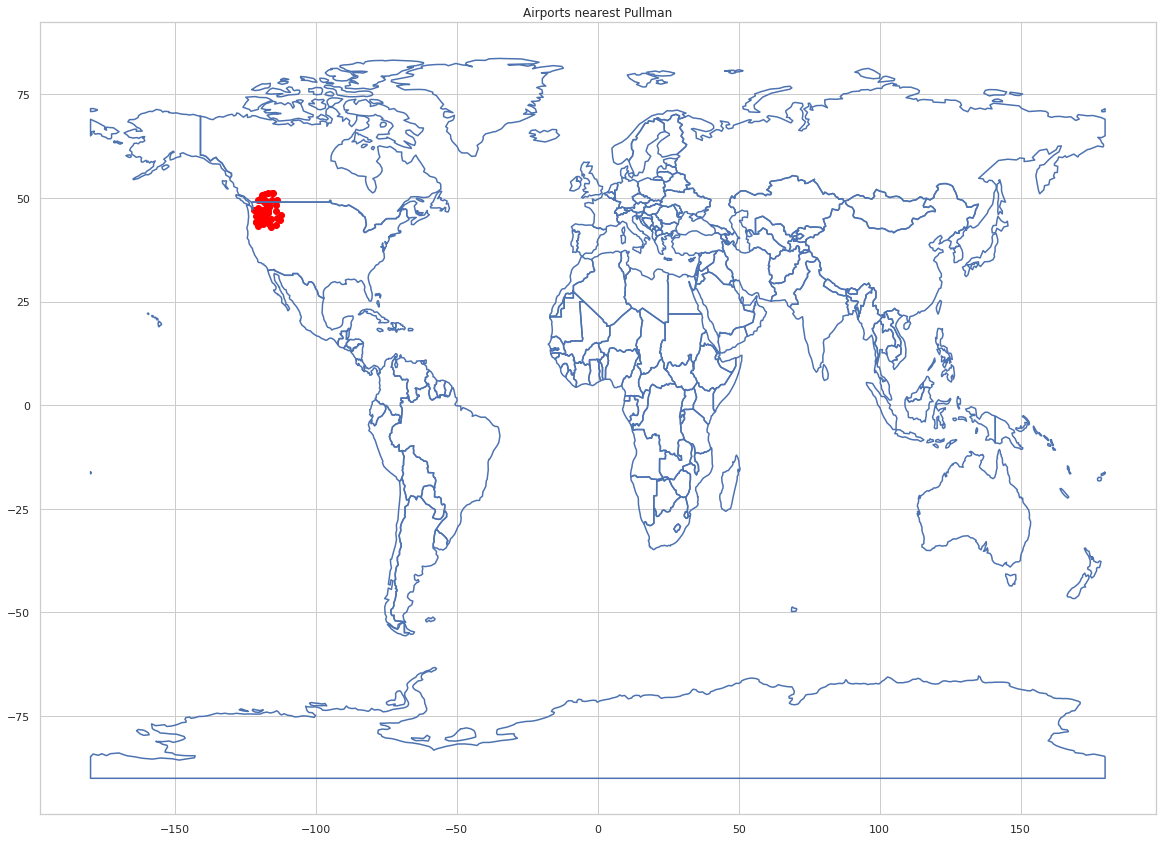

In [30]:
import geopandas

def plot_k_cosest_airports_to_city(city="Pullman", k=10, markersize=2):
    global querier
    
    cities = querier.get_k_closest_airport_to_city(city=city, k=k).toPandas()
    
    points = geopandas.points_from_xy(cities['airport_long'], cities['airport_lat'], crs="EPSG:4326")
    data = {'name': cities['Airport_Name'],'geometry': points}
    gdf = geopandas.GeoDataFrame(data)
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    base = world.boundary.plot(figsize=(20,60));
    base.set_title(f"Airports nearest {city}")
    gdf.plot(ax=base, marker='o', color='red')

plot_k_cosest_airports_to_city(city="Pullman", k=50);

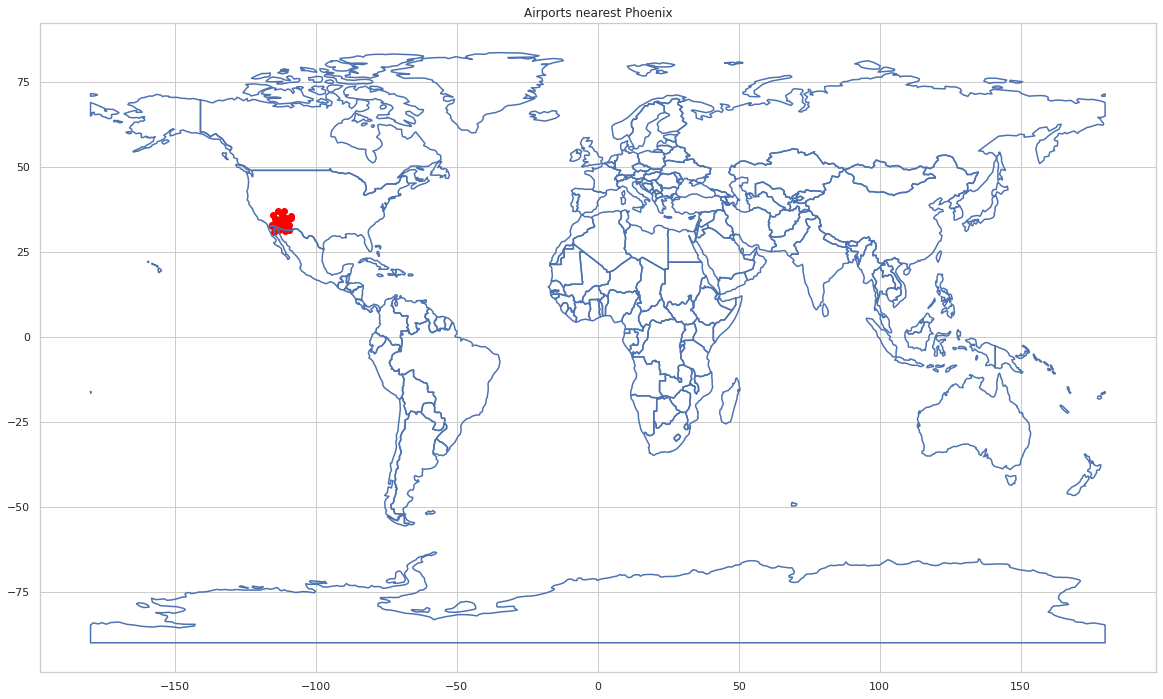

In [31]:
plot_k_cosest_airports_to_city(city="Phoenix", k=50);